In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfincident = pd.read_csv("../../../Data/vw_Incident.csv",
                      encoding='latin-1',
                     low_memory=False)
dfholdactivity = pd.read_csv("../../../Data/vw_HoldActivity.csv",
                      encoding='latin-1',
                     low_memory=False)

In [4]:
dfincident.head()

,TicketNumber,IncidentId,Created_On,Receiveddate,ResolvedDate,Queue,StatusReason,Priority,ValidCase,BusinessFunction,...,IsMagnumCase,IsSignature,Complexity,Numberofreactivations,NumberofChildIncidents,ParentCase,Referencesystem,StateCode,Isrevenueimpacting,IsSOXCase
0,5-0000000464394,FD1F79A6-4007-E711-80E9-3863BB2ED230,2017-03-12 16:26:32,2017-03-12 16:15:00,2017-03-12 16:30:24,<VL EOC Enterprise Orders and Adjustments>,Rejected,Normal,1,Signature to Invoice (S2I),...,0,0,Medium,NaN,NaN,NaN,NaN,Resolved,0,1.0
1,5-0000000464404,57B789CC-4507-E711-80E9-3863BB2ED230,2017-03-12 17:03:23,2017-03-12 00:00:00,2017-03-27 23:48:29,<VL AOC SMS&P Processing>,Problem Solved,Normal,1,Signature to Invoice (S2I),...,0,0,NaN,NaN,NaN,NaN,NaN,Resolved,0,0.0
2,5-0000000464412,480ACC79-4A07-E711-80E9-3863BB2ED230,2017-03-12 17:36:52,2017-03-12 17:30:00,2017-05-12 09:02:44,<VL EOC Ops Out>,Completed,Normal,1,Signature to Invoice (S2I),...,1,1,Medium,NaN,NaN,NaN,NaN,Resolved,0,1.0
3,5-0000000464428,F26F878E-5507-E711-80E9-3863BB2ED230,2017-03-12 18:56:21,2017-03-12 00:00:00,2017-03-27 23:52:24,<VL AOC SMS&P Processing>,Completed,Normal,1,Signature to Invoice (S2I),...,0,0,NaN,NaN,NaN,NaN,NaN,Resolved,0,0.0
4,5-0000000464434,6E7599FE-5C07-E711-80E9-3863BB2ED230,2017-03-12 19:49:25,2017-03-12 19:49:23,2017-03-25 22:00:42,<VL AOC Outbound Shipping>,Problem Solved,Normal,1,Signature to Invoice (S2I),...,1,1,NaN,NaN,NaN,NaN,NaN,Resolved,0,1.0


In [5]:
dfholdactivity.head()

,TicketNumber,ActivityId,RegardingObjectId,HoldDuration,Statuscode,Statecode,TimeZoneRuleVersionNumber,HoldTypeName,Reason,AssignedToGroup,StartTime,EndTime,IsThreeStrikeRule,HoldSubReason,Modified_On,Deleted
0,5-0000000464223,28E0D3AE-0907-E711-80E9-3863BB2ED230,2058B401-7A06-E711-80F3-FC15B428DE24,4620,Completed,Completed,NaN,3rd Party,Trade - Trade Status Hold,Internal,2017-03-12 09:53:03,2017-03-15 14:16:17,0,NaN,2017-03-15 14:16:17,NaN
1,5-0000000418488,79A45B63-3507-E711-80E9-3863BB2ED230,54A3CC57-50FE-E611-80F1-FC15B428DE24,0,Open,Open,NaN,Customer,Price Error,Submitter (Contact),2017-03-12 15:05:55,NaN,0,NaN,2017-03-12 15:05:55,NaN
2,5-0000000402148,241CB04D-3907-E711-80E9-3863BB2ED230,60D07540-BBFA-E611-80F6-FC15B4289B54,120,Completed,Completed,0.0,Customer,PO Number Error,Submitter (Contact),2017-03-12 15:33:56,2017-03-12 17:18:02,0,NaN,2017-03-28 06:15:33,NaN
3,5-0000000463272,996E4A98-5407-E711-80E9-3863BB2ED230,905C98C5-CB05-E711-80F3-FC15B4284D68,3300,Completed,Completed,0.0,Internal,Internal Hold - Team Lead,Submitter (Contact),2017-03-12 18:49:25,2017-03-15 01:46:18,0,NaN,2017-03-15 01:46:18,NaN
4,5-0000000408448,2A1CD3FE-5907-E711-80E9-3863BB2ED230,51E16092-0BFD-E611-80F1-FC15B428DE24,180,Completed,Completed,NaN,Internal,A - Missing information from customer - Confir...,Submitter (Contact),2017-03-12 19:28:00,2017-03-12 22:42:43,0,NaN,2017-03-12 22:42:43,NaN


In [30]:
ticketlist = dfincident["TicketNumber"][dfincident["TicketNumber"].isin(dfholdactivity["TicketNumber"])].tolist()
print(len(ticketlist))
dfincident["TicketNumber"][dfincident["TicketNumber"].isin(dfholdactivity["TicketNumber"])]

12372


27       5-0000000464841
31       5-0000000465163
34       5-0000000465336
35       5-0000000465695
36       5-0000000465873
38       5-0000000465899
39       5-0000000465949
42       5-0000000466189
45       5-0000000466657
46       5-0000000466686
47       5-0000000466962
54       5-0000000467611
57       5-0000000468058
58       5-0000000468105
59       5-0000000468289
60       5-0000000468327
61       5-0000000468401
62       5-0000000468461
63       5-0000000468539
67       5-0000000468738
74       5-0000000469068
76       5-0000000469571
82       5-0000000469897
88       5-0000000470295
89       5-0000000470321
90       5-0000000470369
96       5-0000000470716
98       5-0000000470822
100      5-0000000471093
101      5-0000000471233
              ...       
36047    5-0000000459257
36048    5-0000000459307
36049    5-0000000459339
36050    5-0000000459374
36051    5-0000000459388
36052    5-0000000459400
36054    5-0000000459693
36055    5-0000000459719
36058    5-0000000460190


Make new df with unique ticket numbers and summed hold durations

In [31]:
uniques = dfholdactivity["TicketNumber"].unique()
dfduration = pd.DataFrame(dfholdactivity["TicketNumber"].unique(), columns=["TicketNumber"])
dfduration["HoldDuration"] = 0
for ticket in uniques:
    duration = dfholdactivity.loc[dfholdactivity["TicketNumber"] == ticket, 'HoldDuration'].sum()
    dfduration.loc[dfduration["TicketNumber"] == ticket, "HoldDuration"] = duration
print(dfduration)

          TicketNumber  HoldDuration
0      5-0000000464223          4620
1      5-0000000418488             0
2      5-0000000402148         22200
3      5-0000000463272          6573
4      5-0000000408448         14520
5      5-0000000452541         29023
6      5-0000000463528          6480
7      5-0000000398020          8580
8      5-0000000400452          1320
9      5-0000000401479        491444
10     5-0000000401587        241140
11     5-0000000363780         56100
12     5-0000000401525          1440
13     5-0000000384901         11220
14     5-0000000403064        242169
15     5-0000000407607         37680
16     5-0000000458962          9840
17     5-0000000398891         63531
18     5-0000000456392          9540
19     5-0000000409022         22740
20     5-0000000409674          6840
21     5-0000000414855          6231
22     5-0000000415659         47880
23     5-0000000415827         17820
24     5-0000000454208          8460
25     5-0000000402882         10260
2

In [32]:
dfincident = dfincident.merge(dfduration,how='left', left_on='TicketNumber', right_on='TicketNumber')

In [33]:
dfincident["HoldDuration"].fillna(0, inplace=True)
dfincident["HoldDuration"].isnull().sum()

0

In [34]:
dfincident.to_csv("../../../Data/vw_Incident(HoldDuration).csv", index=False)

# Histogram of HoldDuration

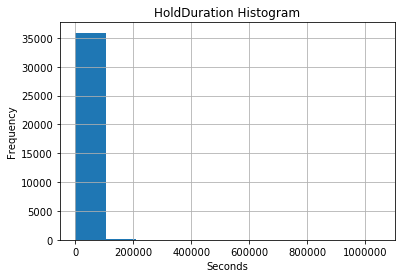

In [122]:
dfincident["HoldDuration"].hist()
plt.title("HoldDuration Histogram")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_all.pdf")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_all.png")
plt.show()

In [174]:
print("Length of dataframe = ", len(dfincident))
print("Number of HoldDurations equal to 0 = ", len(dfincident["HoldDuration"][dfincident["HoldDuration"]==0]))
perc0 = len(dfincident["HoldDuration"][dfincident["HoldDuration"]==0])/len(dfincident)
print("Proportion of HoldDurations equal to 0 = %.2f" % (perc0))

Length of dataframe =  36114
Number of HoldDurations equal to 0 =  24581
Proportion of HoldDurations equal to 0 = 0.68


11532
0.3193221465359694


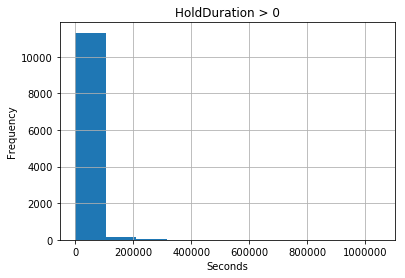

In [179]:
print(len(dfincident["HoldDuration"][dfincident["HoldDuration"]>0]))
print(len(dfincident["HoldDuration"][dfincident["HoldDuration"]>0])/len(dfincident))
dfincident["HoldDuration"][dfincident["HoldDuration"]>0].hist()
# plt.xlim(0,100000)
plt.title("HoldDuration > 0")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_not0.pdf")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_not0.png")
plt.show()

11250
0.3115135404552251


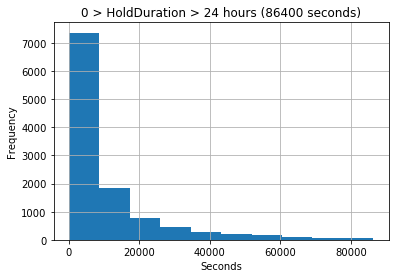

In [180]:
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<86400) & (dfincident["HoldDuration"]>0)]))
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<86400) & (dfincident["HoldDuration"]>0)])/len(dfincident))
dfincident["HoldDuration"][(dfincident["HoldDuration"]<86400) & (dfincident["HoldDuration"]>0)].hist()
plt.title("0 > HoldDuration > 24 hours (86400 seconds)")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_20000.pdf")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_20000.png")
plt.show()

9474
0.26233593620202694


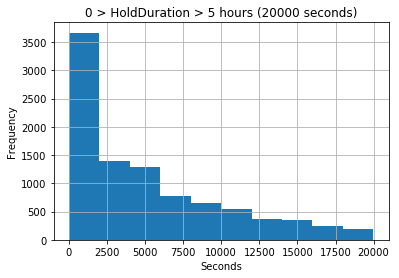

In [183]:
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<20000) & (dfincident["HoldDuration"]>0)]))
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<20000) & (dfincident["HoldDuration"]>0)])/len(dfincident))
dfincident["HoldDuration"][(dfincident["HoldDuration"]<20000) & (dfincident["HoldDuration"]>0)].hist()
plt.title("0 > HoldDuration > 5 hours (20000 seconds)")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_20000.pdf")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_20000.png")
plt.show()

6818
0.18879105056210888


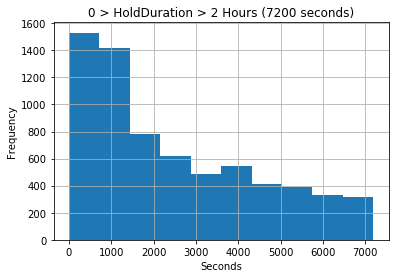

In [184]:
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<7200) & (dfincident["HoldDuration"]>0)]))
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<7200) & (dfincident["HoldDuration"]>0)])/len(dfincident))
dfincident["HoldDuration"][(dfincident["HoldDuration"]<7200) & (dfincident["HoldDuration"]>0)].hist()
plt.title("0 > HoldDuration > 2 Hours (7200 seconds)")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_5000.pdf")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_5000.png")
plt.show()

1950
0.05399568034557235


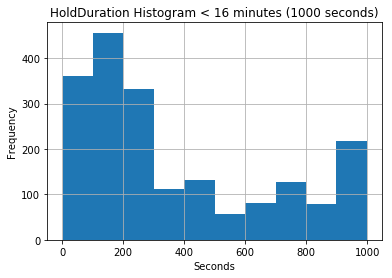

In [185]:
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<1000) & (dfincident["HoldDuration"]>0)]))
print(len(dfincident["HoldDuration"][(dfincident["HoldDuration"]<1000) & (dfincident["HoldDuration"]>0)])/len(dfincident))
dfincident["HoldDuration"][(dfincident["HoldDuration"]<1000) & (dfincident["HoldDuration"]>0)].hist()
plt.title("HoldDuration Histogram < 16 minutes (1000 seconds)")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_5000.pdf")
plt.savefig("../0. Results/Kieron/ABT_Incident_Hold/HoldDuration_Histogram_5000.png")
plt.show()